# Outlier Analysis 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

print("All set up")

All set up


In [10]:
#prevent pandas from creating another index column
df = pd.read_csv("iris.csv").drop(['Unnamed: 0'],axis=1)
df.columns =["sepal length", "sepal width", "petal length", "petal width", "species"]

x = df.iloc[:,0:4].values
y = df.iloc[:,4]
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[]

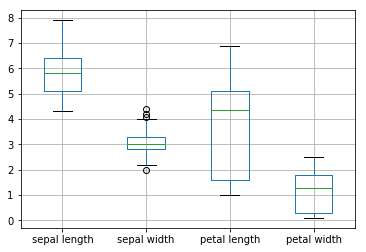

In [11]:
df.boxplot(return_type='dict')
plt.plot()

In [12]:
# Above we observe that there are significant outliers in the sepal width. 
# There are datapoints greater than 4 and less than 2.5 (where are whiskers end)
# Below we will filter out the outliers that are greater than 4. We can do the same
# for those points less than 2.5
sepal_width = x[:,1]
outliers = (sepal_width > 4)
df[outliers]

,sepal length,sepal width,petal length,petal width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [13]:
# Applying Tukey Outlier Labeling
# IQR (Inter Quartile Range) 3.3 - 2.8 = 0.5
# IQR(1.5) = 0.75
# 2.8 - 0.75 = 2.05 which is greater than our min value. 
# This tells us that there are outliers
# Same is applied for third upper third quartile. 
# 3.3 + 0.75 = 4.05 which is less than our max value

x_df = pd.DataFrame(x)
x_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# For Multivariate Analysis you can use scatterplots (found in panadas pairplot function) or 
# boxplots as well to find outliers

## DBSCAN clustring to identify outliers

In [34]:
# DBSCAN - Unsupervised method that clusters core samples (dense areas of a dataset) and 
# denotes non-core samples (sparse portions of the dataset)

# Can be used to identify collective outliers. Outliers should make up < or equal to %5 of the
# total observations  - adjust model paramters accrodingly 

# Use case: self driving cars to detect lanes and roads that are suitable for driving

# Important paramters for DBSCAN are eps and in_samples

In [35]:
import seaborn as sb
import sklearn
from sklearn.cluster import DBSCAN 
from collections import Counter

In [45]:
# Here we are going to continue to use the iris data set from above
data = df.iloc[:,0:4].values
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
# instatiating dbscan model
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)

In [38]:
# VISUALIZE RESULTS 
outliers_df = pd.DataFrame(data)
print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN Outlier Detection')

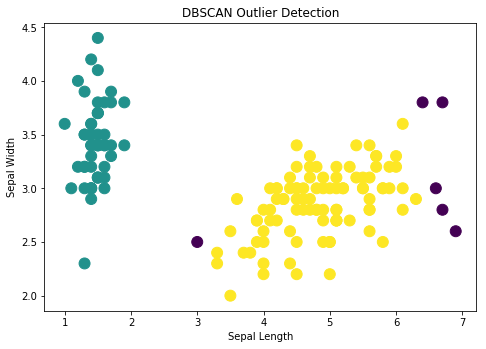

In [39]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_
ax.scatter(data[:,2],data[:,1], c = colors, s =120)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title("DBSCAN Outlier Detection")

<p> 
    Here we can observe that %4 of our data consists of outliers denoted by the 6 datapoints
    that are labeled with a -1 in the Counter object above using the Counter function.
    Also listed are the 6 outliers in the dataframe below it. 
</p>